In [2]:
from prepare import OpenSLR149

processor = OpenSLR149()
data = processor.read_transcript()
print(f"Number of rows: {len(data)}")
print("Sample row:", data[0])

Number of rows: 1010
Sample row: ('卫藏地区_zmbm101', 'བཀྲ ཤིས ཁྱོད དྲང མོ ཤོད ཟླ འདི དག ལ གང ན སོང བ ཡིན')


In [3]:
from botok import TSEK

syls_arr = [row[1] for row in data]
texts = [TSEK.join(syls.split()) for syls in syls_arr]
print(f"Number of texts: {len(texts)}")
print(f"Sample text: {texts[0]}")


Number of texts: 1010
Sample text: བཀྲ་ཤིས་ཁྱོད་དྲང་མོ་ཤོད་ཟླ་འདི་དག་ལ་གང་ན་སོང་བ་ཡིན


In [4]:
from utils import Phenomer
from tqdm import tqdm

token_lens = []
for text in tqdm(texts, desc="Tokenizing"):
    token_lens.append(len(Phenomer().tokenize(text)))

print(f"Min token length: {min(token_lens)}")
print(f"Max token length: {max(token_lens)}")
print(f"Average token length: {sum(token_lens) / len(token_lens)}")

Tokenizing: 100%|██████████| 1010/1010 [07:52<00:00,  2.14it/s]

Min token length: 1
Max token length: 26
Average token length: 6.564356435643564


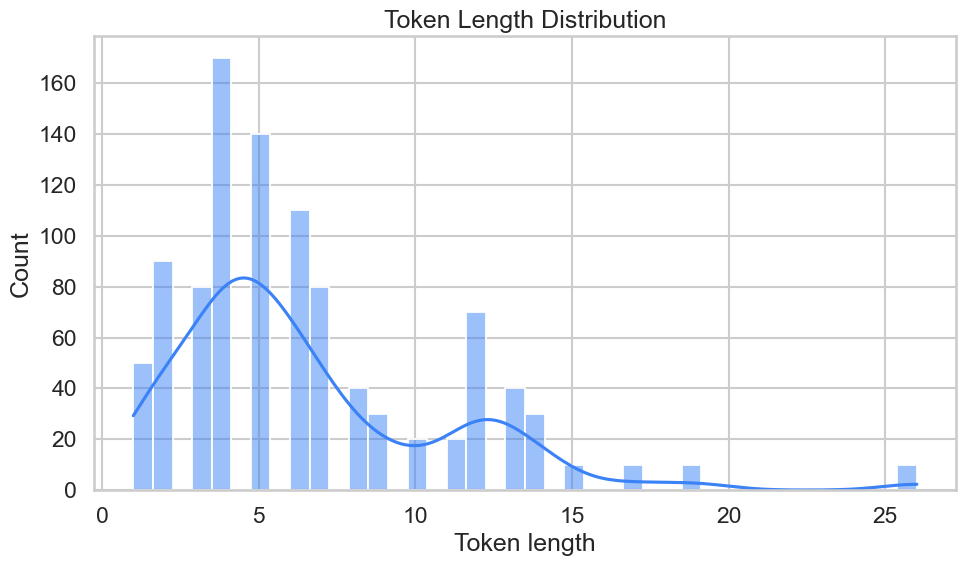

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk")
df = pd.DataFrame({"token_len": token_lens})

# Histogram + KDE
plt.figure(figsize=(10, 6))
sns.histplot(df["token_len"], bins=40, kde=True, color="#3b82f6", edgecolor="white")
plt.title("Token Length Distribution")
plt.xlabel("Token length")
plt.ylabel("Count")
plt.tight_layout()
plt.show()